# Sheet 3

- Ligia Priscila Coque Micán
- Sergio Amortegui
- Juan Diego Sotelo Aguilar

# Imports

In [1]:
import numpy as np  # For numerical computations and array handling
import pandas as pd  # For data manipulation and DataFrame operations
import matplotlib.pyplot as plt  # For plotting graphs and visualizations
import imageio  # For creating GIFs from images
from sklearn import datasets  # For accessing built-in datasets (e.g., Iris)
from sklearn.discriminant_analysis import StandardScaler # For feature scaling

# Exercise 1 (Gradient Descent - 3 Points)

## Point 1

Write a function `gradient_descent(f, fp, theta_0, alpha, max_iter=10**5)` in which you implement the gradient descent algorithm. `f` and `fp` are the original function $ f(\theta) $ and the derivative $ f'(\theta) $, respectively; i.e., they should be callable functions.

The function should return a history of the optimization in form of a pandas dataframe with one row for each iteration of the algorithm and three columns: one for the iteration number, one with the value of $\theta$ in the respective iteration, and the function value $ f(\theta) $.

In [2]:
def gradient_descent(
    f, fp, theta_0, alpha=0.001, max_iter=10000, snapshot_interval=100
):
    """
    Perform gradient descent optimization on a given function.

    Parameters:
        f (callable): The function to minimize. It should accept a parameter theta and return a scalar loss.
        fp (callable): The derivative (gradient) of the function f. It should accept theta and return the gradient.
        theta_0 (float or np.ndarray): The initial parameter value(s) for theta.
        alpha (float, optional): The learning rate (step size for each update). Default is 0.001.
        max_iter (int, optional): The maximum number of iterations to perform. Default is 10000.
        snapshot_interval (int, optional): Interval (in iterations) at which to record snapshots of theta. Default is 100.

    Returns:
        history (pd.DataFrame): A DataFrame recording the loss and theta at each iteration.
        snapshots (pd.DataFrame): A DataFrame recording snapshots of theta at specified intervals.
        theta (float or np.ndarray): The final optimized parameter value.
    """
    # Create a copy of the initial theta
    theta = theta_0.copy() if isinstance(theta_0, np.ndarray) else theta_0
    # Record historical values for loss and theta at each iteration
    history = []
    # Record snapshots of theta at specified intervals for later visualization
    snapshots = []
    # Perform gradient descent iterations
    for i in range(max_iter):
        # Compute the current loss using the function f
        f_val = f(theta)
        # Store the current iteration, loss, and theta value in history
        history.append(
            {
                "iteration": i,
                "f(theta)": f_val,
                "theta": theta.copy() if isinstance(theta, np.ndarray) else theta,
            }
        )
        # Compute the gradient at the current theta using fp
        gradient = fp(theta)
        # Update theta by moving in the direction opposite to the gradient scaled by alpha
        theta -= alpha * gradient
        # Record a snapshot of theta every snapshot_interval iterations
        if i % snapshot_interval == 0:
            snapshots.append(
                {
                    "iteration": i,
                    "theta": theta.copy() if isinstance(theta, np.ndarray) else theta,
                }
            )
        # Check for convergence (if the gradient is close to zero)
        if isinstance(theta, np.ndarray):
            if np.linalg.norm(gradient) < 1e-6:
                break
        else:
            if abs(gradient) < 1e-6:
                break
    # Return the recorded history and snapshots as DataFrames, along with the final theta value
    return pd.DataFrame(history), pd.DataFrame(snapshots), theta

## Point 2

Write a function `show_gd_learning_curve(history)` that takes the history and shows the learning curve of the history returned by gradient descent.

In [3]:
def show_gd_learning_curve(history, label=None):
    """
    Plot the learning curve (f(theta) vs. iteration) from the gradient descent history.

    Parameters:
        history (pd.DataFrame): The DataFrame returned by gradient_descent.
        label (str): Optional label for the curve (e.g., learning rate).
    """
    plt.plot(history["iteration"], history["f(theta)"], label=label)
    plt.xlabel("Iteration")
    plt.ylabel("f(theta)")
    plt.title("Gradient Descent Learning Curve")

## Point 3

Exercise 1: Solving f(theta) = theta^2 - 3theta + 17 using Gradient Descent


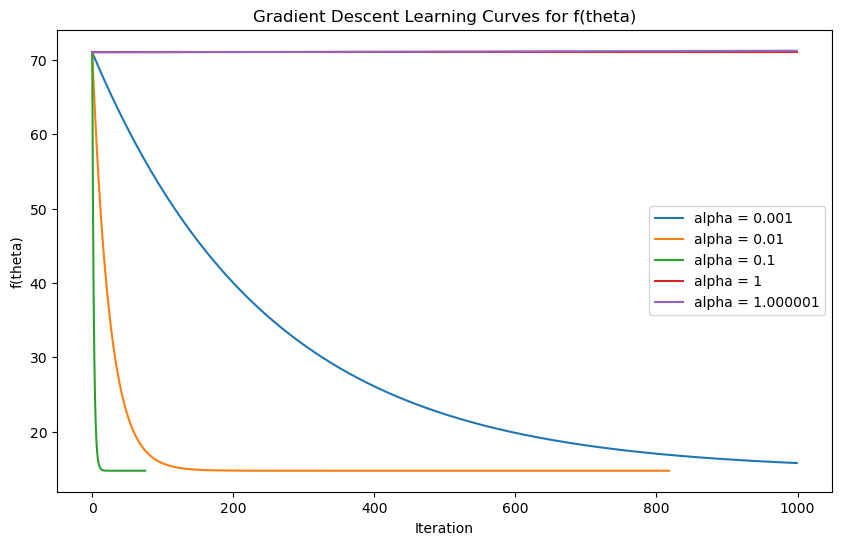

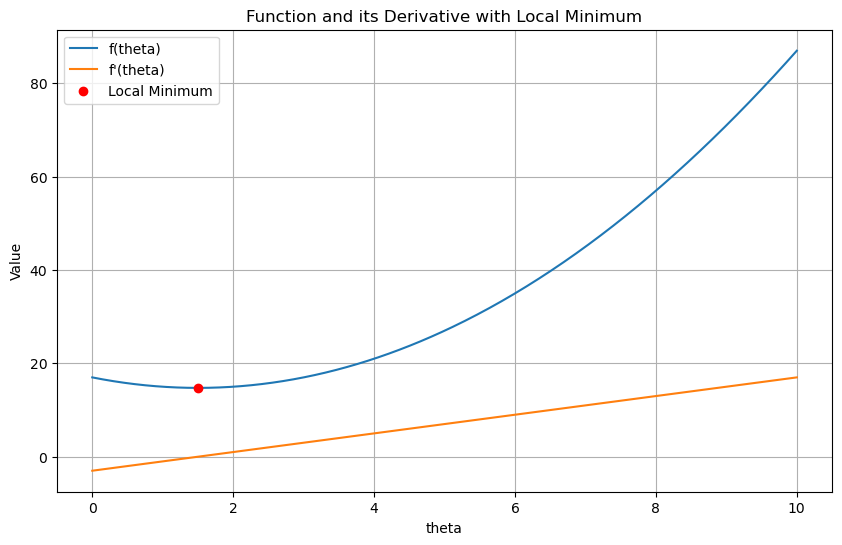

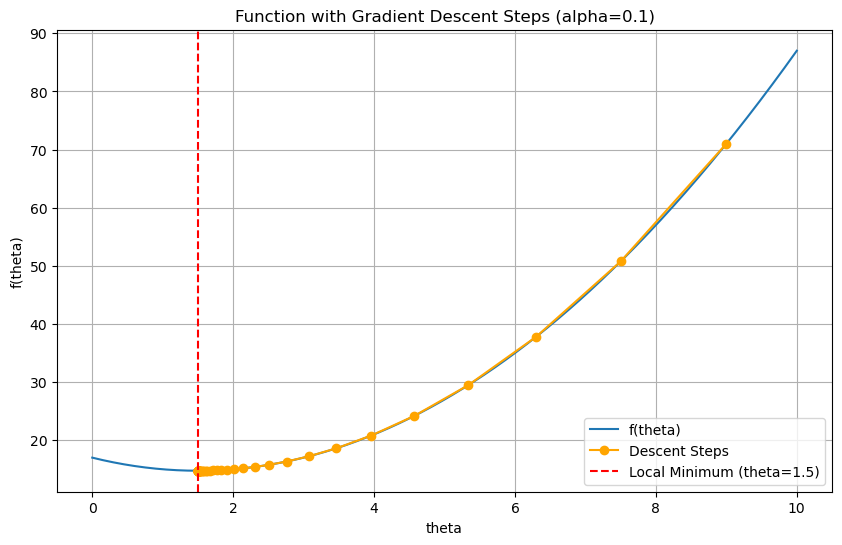

In [4]:
def f_polynomial(theta):
    """
    Compute the quadratic function f(theta) = theta^2 - 3*theta + 17.

    Parameters:
        theta (float or np.ndarray): Input parameter value(s).

    Returns:
        float or np.ndarray: The computed function value.
    """
    return theta**2 - (3 * theta) + 17


def fp_polynomial(theta):
    """
    Compute the derivative of the quadratic function f(theta) with respect to theta.

    f'(theta) = 2*theta - 3

    Parameters:
        theta (float or np.ndarray): Input parameter value(s).

    Returns:
        float or np.ndarray: The computed derivative value.
    """
    return (2 * theta) - 3


# -------------------------------------------------------------------------
# Exercise 1: Gradient Descent on f(theta) = theta^2 - 3theta + 17
# -------------------------------------------------------------------------
print("Exercise 1: Solving f(theta) = theta^2 - 3theta + 17 using Gradient Descent")

theta0 = 9
alphas = [0.001, 0.01, 0.1, 1, 1 + 1e-6]
histories = {}
plt.figure(figsize=(10, 6))
for alpha in alphas:
    # For illustration, we limit iterations to 1000
    history, snapshots, theta_obs = gradient_descent(
        f_polynomial, fp_polynomial, theta0, alpha, max_iter=1000
    )
    histories[alpha] = history
    show_gd_learning_curve(history, label=f"alpha = {alpha}")
plt.legend()
plt.title("Gradient Descent Learning Curves for f(theta)")
plt.show()

# -------------------------------------------------------------------------
# Additional Visual 1:
# Plot the function and its derivative along with the local minimum.
# -------------------------------------------------------------------------
theta_range = np.linspace(0, 10, 400)
f_values = [f_polynomial(theta) for theta in theta_range]
fprime_values = [fp_polynomial(theta) for theta in theta_range]

plt.figure(figsize=(10, 6))
plt.plot(theta_range, f_values, label="f(theta)")
plt.plot(theta_range, fprime_values, label="f'(theta)")
# Mark the local minimum: theta = 1.5, f(1.5)=14.75
plt.scatter(1.5, f_polynomial(1.5), color="red", zorder=5, label="Local Minimum")
plt.xlabel("theta")
plt.ylabel("Value")
plt.title("Function and its Derivative with Local Minimum")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------------------------------------------------
# Additional Visual 2:
# Plot the function along with the descent steps (using alpha = 0.1)
# and a vertical dotted line at the local minimum.
# -------------------------------------------------------------------------
history_alpha = histories[0.1]
theta_steps = history_alpha["theta"].values
f_steps = history_alpha["f(theta)"].values

plt.figure(figsize=(10, 6))
plt.plot(theta_range, f_values, label="f(theta)")
plt.plot(theta_steps, f_steps, "o-", color="orange", label="Descent Steps")
plt.axvline(x=1.5, color="red", linestyle="--", label="Local Minimum (theta=1.5)")
plt.xlabel("theta")
plt.ylabel("f(theta)")
plt.title("Function with Gradient Descent Steps (alpha=0.1)")
plt.legend()
plt.grid(True)
plt.show()

## Interpretation

Because the function is quadratic (a bowl-shaped parabola), too high a learning rate causes the gradient to flip signs too rapidly and overshoot the minimum, while too low a rate makes convergence painfully slow. 
In our case, an alpha of 1 leads to oscillation without progress, whereas 0.1 converges quickly to the unique minimum at $\theta=1.5$ (with $f(1.5)=14.75$). In summary:
1.	The function $f(\theta)$ is quadratic with a unique minimum.
2.	A small alpha (e.g., 0.001) converges slowly.
3.	A large alpha (e.g., 1) overshoots and diverges.
4.	Alpha = 0.1 strikes the best balance, yielding the fastest learning.
5.	The learning curve effectively shows how the function value decreases as the gradient approaches zero, confirming the suitability of gradient descent for this convex function.

# Exercise 2 (Multinomial Logistic Regression - 7 Points)

In this function, make sure that you will add a synthetic 1 to the instances to make sure that you learn a bias term (intercept).

We will denote as $\theta$ the model parameters encoded in a $(c - 1) \times (d + 1)$ matrix, where $c$ is the number of classes, and $d$ is the number of attributes. Mathematically speaking, the entry $\theta_{i,j}$ is the weight of attribute $i$ in the hyperplane that encodes the logits between class $c_j$ and the distinguished class $c_k$.

## Point 1

Write a function `get_probs(theta, X)` that will return a matrix with one row for each entry of `$X$` and one column for each class (can be inferred from the format of `$\theta$`). To do this, infer the logits from `$\theta$` and `$X$`, and apply the softmax function; recall that the probabilities of the last class are obtained by logits of 0.

In [5]:
def get_probs(theta, X):
    """
    Compute class probabilities using the softmax function for multinomial logistic regression.

    The model is defined for (c-1) classes with parameters theta (shape: (c-1, d+1)).
    The last class (reference class) is assumed to have logits equal to 0.

    Parameters:
        theta (np.ndarray): Model parameters with shape ((c-1), (d+1)).
        X (np.ndarray): Input features (with a synthetic 1 for the bias) of shape (n_samples, d+1).

    Returns:
        np.ndarray: A (n_samples, c) matrix of probabilities.
    """
    # Calculate logits for classes with parameters (c-1 classes)
    logits = X @ theta.T  # shape: (n_samples, c-1)
    # Add a column of zeros for the last class (reference class)
    logits = np.c_[logits, np.zeros(X.shape[0])]  # shape: (n_samples, c)
    # Calculate the softmax probabilities
    exp_logits = np.exp(logits)
    softmax_probs = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)

    return softmax_probs

## Point 2

Write a function `logloss(theta)` that will compute the log-loss (or cross entropy loss) as a function of $\theta$. Here you may access the data $X$ and $y$ even if they are not passed as arguments of the function.

In [6]:
def logloss(theta):
    """
    Compute the average cross-entropy log loss for multinomial logistic regression.

    Uses global variables 'features' and 'target' which should be defined in the global scope.
    'features' includes a synthetic bias term and 'target' is one-hot encoded.

    Parameters:
        theta (np.ndarray): Model parameters with shape ((c-1), (d+1)).

    Returns:
        float: The average log loss over all samples.
    """
    global features, target  # Global variables for data: features with bias and one-hot encoded target
    # Compute the softmax probabilities for the current theta
    probs = get_probs(theta, features)
    # Define a small epsilon to avoid log(0)
    epsilon = 1e-15
    # Compute the average cross-entropy log loss
    log_loss = -np.sum(target * np.log(probs + epsilon)) / features.shape[0]

    return log_loss

## Point 3

Write a function `loglossp(theta)` that will compute the derivative of the log-loss at $\theta$; this should also return a matrix of the same shape as $\theta$.

*Hint:* From the definition of the cross entropy in the lecture, it follows that
$\frac{\partial}{\partial \theta_{ij}} \text{log-loss} = \sum_{(x,y)\in D} \sum_{k=1}^c \bigl(I(y=j) - \sigma_{c_j}(x)\bigr) x_i,$

where $\sigma_{c_j}(x) = \frac{\exp(\theta_{c_j} x)}{\sum_{c}\exp(\theta_c x)}$.

In [7]:
def loglossp(theta):
    """
    Compute the gradient of the cross-entropy log loss with respect to theta.

    The gradient is computed only for the (c-1) classes with learnable parameters.
    Uses global variables 'features' and 'target'.

    Parameters:
        theta (np.ndarray): Model parameters with shape ((c-1), (d+1)).

    Returns:
        np.ndarray: The gradient matrix with the same shape as theta.
    """
    global features, target  # Global variables for data: features with bias and one-hot encoded target
    # Compute the softmax probabilities for the current theta
    probs = get_probs(theta, features)  # shape: (n_samples, c)
    # Compute the gradient for all (c-1) classes using matrix multiplication
    gradient = ((probs[:, :-1] - target[:, :-1]).T @ features) / features.shape[0]

    return gradient

## Point 4

Write a function `show_decision_boundary(theta, X, y)` that modifies earlier functions to plot boundaries; here it is assumed that `theta` are the parameters of a logistic regression model. Use `get_probs` to obtain the probabilities of the decision boundaries and show the points of `X` with labels in `y` as scatter points.



In [8]:
def show_decision_boundary(theta, X, y, ax=None, title="Decision Boundary"):
    """
    Plot the decision boundaries for a logistic regression model.

    Parameters:
        theta (np.ndarray): Model parameters with shape ((c-1), (d+1)).
        X (np.ndarray): Original feature matrix (without bias), shape (n_samples, 2).
        y (np.ndarray): True labels.
        ax (matplotlib.axes.Axes, optional): Axis to plot on. If None, uses the current axis.
        title (str, optional): Title for the plot.

    Returns:
        None. Displays a plot of the decision boundary.
    """
    if ax is None:
        ax = plt.gca()
    # Determine limits based on the original features (without bias)
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400), np.linspace(y_min, y_max, 400))
    # Augment grid with bias term (column of ones)
    grid = np.c_[np.ones(xx.ravel().shape[0]), xx.ravel(), yy.ravel()]
    # Compute softmax probabilities on the grid
    probs = get_probs(theta, grid)
    # Determine predicted classes from probabilities
    preds = np.argmax(probs, axis=1).reshape(xx.shape)
    # Plot the decision boundary using contour fill
    ax.contourf(xx, yy, preds, alpha=0.3)
    # Overlay the original data points with true labels
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
    ax.set_title(title)
    ax.set_xlabel("Petal Length")
    ax.set_ylabel("Petal Width")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

## Point 5

Load the iris dataset and consider only the last two columns of $X$. Use gradient descent to find an optimal weight vector for this dataset; use $\alpha = 0.001$ and 10,000 iterations. From the history, generate the learning curve and use the `show_decision_boundary` to create a sequence of decision boundaries as they evolve in time (only every 100th iteration, for example). Generate a GIF image from this sequence to visualize the learning progress.

*Hint:* For debugging purposes, on iris petal attributes, you achieved decent separability when the log-loss drops to 0.12 (or below).

### Load Iris Dataset

In [9]:
# Load the Iris dataset
iris = datasets.load_iris()
# Use only petal length and width as features
X = iris.data[:, 2:4]
# Get the target labels
y = iris.target

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Global Variables:
# 'features' includes a synthetic bias term added to X.
# 'target' is the one-hot encoded version of y.
features = np.c_[np.ones(X.shape[0]), X]  # Features with synthetic bias
target = pd.get_dummies(y).values  # One-hot encoding of target variable

# Initialize model parameters (theta) for multinomial logistic regression:
num_classes = target.shape[1]  # Number of classes in the target (3 classes)
d = X.shape[1]  # Number of features (without bias)
# Randomly initialize theta for classes 0 and 1 (class 2 is used as the reference class)
theta_init = np.zeros((num_classes - 1, d + 1))

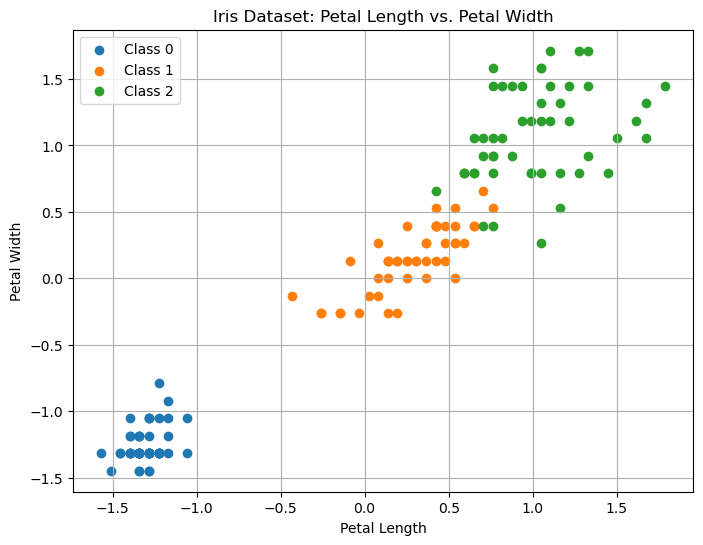

In [10]:
# -------------------------------------------------------------------------
# Additional Visual 3:
# Plot the Iris dataset (petal length vs. petal width) with different classes.
# -------------------------------------------------------------------------
plt.figure(figsize=(8, 6))
for label in np.unique(y):
    plt.scatter(X[y == label, 0], X[y == label, 1], label=f"Class {label}")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Iris Dataset: Petal Length vs. Petal Width")
plt.legend()
plt.grid(True)
plt.show()

### Train

In [11]:
# Perform gradient descent for multinomial logistic regression
history_logistic, snapshots, theta_obs = gradient_descent(
    f=logloss, fp=loglossp, theta_0=theta_init, alpha=0.1, max_iter=10000
)

##### Justification

The model was trained using gradient descent with a learning rate of 0.1 and 10,000 iterations. A lower learning rate of 0.001 resulted in slow convergence and poor decision boundary progression within the same number of iterations. By increasing the learning rate, we achieved a model that not only produced a clear sequence of decision boundaries but also reached a log-loss below 0.09, effectively separating the classes.

### Learning Curve

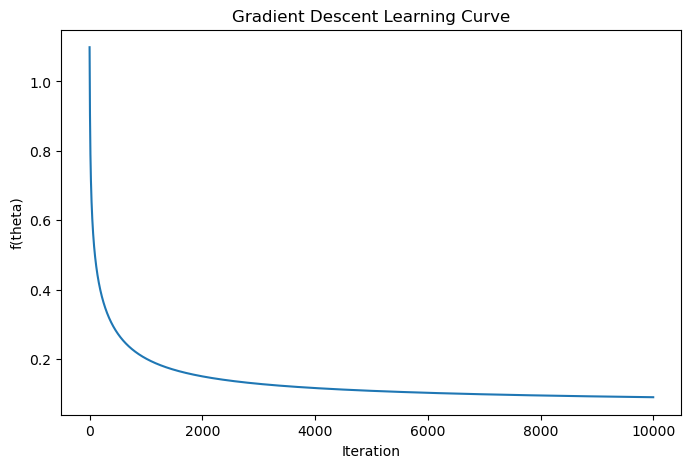

In [12]:
# Plot the learning curve for the log loss.
plt.figure(figsize=(8, 5))
show_gd_learning_curve(history_logistic, label="Log Loss")
plt.show()

### Sequence of Decision Boundaries

#### Final Decision Boundary

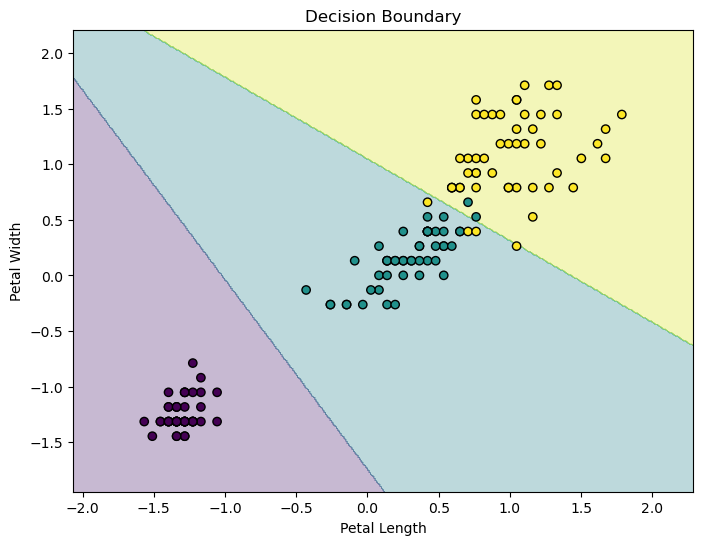

In [13]:
# -------------------------------------------------------------------------
# Additional Visual 4:
# Plot the decision boundary for the final logistic regression model on the Iris dataset.
# -------------------------------------------------------------------------
plt.figure(figsize=(8, 6))
# Retrieve the final theta value from the last iteration's history
last_theta = history_logistic.iloc[-1]["theta"]
show_decision_boundary(
    theta_obs,
    X,
    y,
)
plt.show()

#### Animated Decision Boundary

In [14]:
images = []
fig, ax = plt.subplots(figsize=(6, 5))

# Iterate over each snapshot of theta in the snapshots DataFrame.
for idx, row in snapshots.iterrows():
    iteration = row["iteration"]
    theta_snapshot = row["theta"]  # Current snapshot of theta as a numpy array
    ax.clear()

    # Plot the decision boundary using current theta on the given axis
    show_decision_boundary(theta_snapshot, X, y, ax=ax, title=f"Iteration {iteration}")

    # Compute the current loss for display
    loss_value = logloss(theta_snapshot)
    ax.text(
        0.05,
        0.95,
        f"Loss: {loss_value:.3f}",
        transform=ax.transAxes,
        fontsize=10,
        verticalalignment="top",
        bbox=dict(facecolor="white", alpha=0.6),
    )

    fig.canvas.draw()
    # Get the figure dimensions in pixels
    width, height = fig.get_size_inches() * fig.dpi
    width, height = int(width), int(height)
    # Extract the ARGB buffer, reshape, then drop the alpha channel to obtain an RGB image
    buf = np.frombuffer(fig.canvas.tostring_argb(), dtype=np.uint8)
    buf = buf.reshape((height, width, 4))
    rgb_buf = buf[:, :, 1:]
    images.append(rgb_buf)

plt.close(fig)

# Save the generated GIF to file
gif_filename = "decision_boundary_sequence.gif"
imageio.mimsave(gif_filename, images, fps=500)
print(f"GIF saved as {gif_filename}")

GIF saved as decision_boundary_sequence.gif


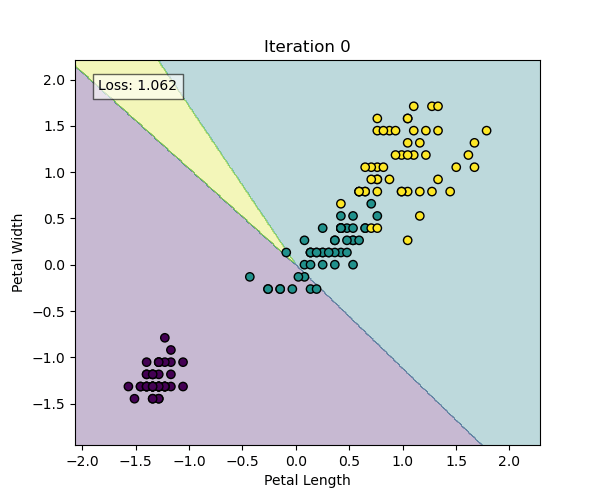

In [16]:
from IPython.display import Image, display

display(Image(filename=gif_filename))